# COGS 108 - Final Project 

# Overview

Emissions from vehicles have been adding to the everlasting modern-day problems of air pollution and traffic. The introduction of electric vehicles along with a greater emphasis placed on walking, biking, and/or using micro-mobility resources for transportation has reduced the impact to the growing gas emission problem as well as traffic congestion. However, there is still a reliance on vehicles to get people to their destinations, which is what rideshare services alleviate. These programs allow for multiple people to join a ride going in a similar destination, serving as a carpool, which saves gas, time, and money. 

Many people have contemplated either buying a car or just continuing to use rideshare options, especially when Uber and Lyft constantly promote their services with discount codes. New vehicles cost tens of thousand dollars, and research shows that cars are not even used 95% of the time(Barter). On average, a car is in usage for 6 out of the 168 hours of the week. This number is so small and on top of that the cost of owning a car continues to increase because of the maintenance, insurance, and the possibility of crashes. 

Rideshare programs such as Uber and Lyft are almost ubiquitous in our modern day world. Studies have shown that rideshare services have increased 37% from 1.9 billion to 2.61 billion people from 2016 to 2017. Both Uber and Lyft claim that one of their driving principles revolves around reducing traffic congestion through minimizing car ownership and usage. In urban cities such as San Francisco, Los Angeles and New York, analyzing peak commute times would prove to be a sound indicator of whether these companies are alleviating the flow of traffic.  

To investigate, we would analyze accumulated data about traffic patterns during peak commute times in densely populated cities since the onset of rideshare popularity. We would also look at specific usage trends with regards to rideshare program data to draw correlations. 


# Names

- Brendan Wong
- Pooja Yadav
- Kaila Lee
- Rajandeep Kaur
- Zoey Chesny

# Group Members IDs

- A15749312
- A########
- A12792644
- A########
- A13303136

# Research Question

To what extent do rideshare programs (e.g. Uber, Lyft) impact traffic during peak commute times? 


## Background and Prior Work

To answer our research question and hypothesis, we'll be using Uber's Movement dataset to compare traffic and commute times on weekdays to that of DataSF's back before ridesharing was widespread. 

or

To answer our research question and hypothesis, we'll be using Uber's Movement dataset to compare traffic and commute times on weekdays between 2016 and 2018. Just from 2016 to 2017 alone, there was a 37% increase of use in rideshare services so there would be a big enough discrepancy to determine increase or decrease of traffic

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

Most of our data was pulled from [Uber's Movement Dataset](https://movement.uber.com/?lang=en-US). Each row is the aggregated mean and standard deviation of travel time and geometric travel time over the course of each quarter in the fiscal year. Sources and destinations are determined by 'sourceid' and 'dstid'. We decided to choose the inner join of sources and destinations with over 10,000 rows as a source, and 5,000 as a destination. Furthermore we'd be tracking commute times so we'd be further filtering from rush hour in the Bay Area, all the time in San Francisco, but typically 7am - 10am and 3pm - 7pm.

In [2]:
# Imports

#Display plots directly in notebook
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2018 quarter 3 weekdays
# will need to download separately and store in working dir
q3_2018_location = 'san_francisco-censustracts-2018-3-OnlyWeekdays-HourlyAggregate.csv'

uber_df = pd.read_csv(q3_2018_location)
uber_df.shape
# set contains almost 10 million rows of data

(9613339, 7)

In [3]:
# sort by hours of the day 
uber_df.sort_values('hod')

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
4806669,1498,1069,0,387.64,165.81,363.88,1.39
2732148,1742,1743,0,594.00,216.39,532.56,1.83
2732147,1743,1733,0,1319.04,326.51,1284.17,1.25
2732146,1772,1443,0,760.37,251.59,723.62,1.36
5281306,629,96,0,1102.59,329.58,1061.21,1.31
2732145,1744,1723,0,115.27,79.08,103.72,1.48
7469551,595,817,0,1603.33,327.38,1571.14,1.22
8887844,2597,1603,0,1358.88,71.14,1356.94,1.06
8887843,2496,2613,0,1799.39,410.15,1758.00,1.23
7469526,981,2409,0,430.25,235.16,382.09,1.71


In [4]:
uber_df['sourceid'].value_counts();#obtain value counts 
sources = uber_df['sourceid'].value_counts() < 10000;  
sources = sources.reset_index() # series with rows/booleans indicating over 10,000 occurances

for index, items in sources.iterrows():
    if not items['sourceid']: 
        sources.drop(index, inplace=True) # drop rows with less than 10k rides
    
sources.shape # 257 sources that have over 10000 trip averages

for index, items in sources.iterrows():
    uber_df = uber_df[uber_df.sourceid != items['index']] 
    # this seems really inefficient and takes a long time, any suggestions on how to remove low trip rows
    # without repeatedly creating a new one each time?
    
uber_df.shape #3,461,407 rows eliminated ~6 million rows



KeyboardInterrupt: 

In [ ]:
uber_df['dstid'].value_counts()

destinations = uber_df['dstid'].value_counts() < 5000
destinations = destinations.reset_index()

for index, items in destinations.iterrows():
    if not items['dstid']: 
        destinations.drop(index, inplace=True) # drop rows with less than 5k rides
    
destinations.shape # destinations that have over 5k trip averages

for index, items in destinations.iterrows():
    uber_df = uber_df[uber_df.dstid != items['index']]
    
uber_df.shape #436,433 rows left

In [ ]:
hours = [0,1,2,3,4,5,6,11,12,13,14,20,21,22,23,24]

for hour in hours:
    uber_df = uber_df[uber_df.hod != hour]
    
uber_df.shape # 172k rows left

uber_df.sort_values('hod')

# Data Cleaning

Describe your data cleaning steps here.

1) Check for missing values 

2) Consolidate dataset 


* We want to see the trends of how uber usage increases over time and compare it to commute times
* exclude data that has small travel times to account for 
* dropped geometric travel time because we only care about arithmatic one
* travel time is given in seconds 


1) Determine peak travel hour of days 

2) How do mean times change from 2016 to 2018

3) pool from other sources to count the number of trips 

4) find common sources and destinations 

In [ ]:
# GOAL: find 4 most popular travel routes

num_sources = uber_df['sourceid'].value_counts()
num_dest = uber_df['dstid'].value_counts()

# find most popular routes based on sources and destinations 
# 4 most popular sources: 
pop_4_sources = num_sources[:4]
pop_4_dest = num_dest[:4]
print('top 4 most popular sources')
print(pop_4_sources)

# 4 most popular destinations: 
print('top 4 most popular destinations')
print(pop_4_dest)

# check if a route exists between them
uber_df[uber_df['sourceid'] == 963][uber_df['dstid'] == 234]

# check if these popular routes are in all the datasets 

The 4 most popular routes are from the following sources --> destinations. 

| popularity rank| source | destination  |
|---|---|---|
|1   |963   |234 |
|2   |212   |2622|
|3   |457   |2231|
|4   |532   |2308|

These routes were selected since they were from the most 4 most popular source cities to the 4 most popular destination cities.

A good question to ask- why are there more most popular destinations than sources?

In [48]:
# load the other datasets 

# 2018 quarter 3 weekdays
# will need to download separately and store in working dir
q1_2016_location = 'san_francisco-censustracts-2016-1-OnlyWeekdays-HourlyAggregate.csv'
q2_2016_location = 'san_francisco-censustracts-2016-2-OnlyWeekdays-HourlyAggregate.csv'
q3_2016_location = 'san_francisco-censustracts-2016-3-OnlyWeekdays-HourlyAggregate.csv'
q4_2016_location = 'san_francisco-censustracts-2016-4-OnlyWeekdays-HourlyAggregate.csv'
q1_2017_location = 'san_francisco-censustracts-2017-1-OnlyWeekdays-HourlyAggregate.csv'
q2_2017_location = 'san_francisco-censustracts-2017-2-OnlyWeekdays-HourlyAggregate.csv'
q3_2017_location = 'san_francisco-censustracts-2017-3-OnlyWeekdays-HourlyAggregate.csv'
q4_2017_location = 'san_francisco-censustracts-2017-4-OnlyWeekdays-HourlyAggregate.csv'
q1_2018_location = 'san_francisco-censustracts-2018-1-OnlyWeekdays-HourlyAggregate.csv'
q2_2018_location = 'san_francisco-censustracts-2018-2-OnlyWeekdays-HourlyAggregate.csv'

# read in all the csv files from the previous 10 quarters
uber_df_1 = pd.read_csv(q1_2016_location)
uber_df_2 = pd.read_csv(q2_2016_location)
uber_df_3 = pd.read_csv(q3_2016_location)
uber_df_4 = pd.read_csv(q4_2016_location)
uber_df_5 = pd.read_csv(q1_2017_location)
uber_df_6 = pd.read_csv(q2_2017_location)
uber_df_7 = pd.read_csv(q3_2017_location)
uber_df_8 = pd.read_csv(q4_2017_location)
uber_df_9 = pd.read_csv(q1_2018_location)
uber_df_10 = pd.read_csv(q2_2018_location)
uber_df_11 = pd.read_csv(q3_2018_location)

In [67]:
# check if a route exists in each data frame 

# 1st most popular route is route 1 from 963 --> 234 
df1_route1 = uber_df_1[uber_df_1['sourceid'] == 963][uber_df_1['dstid'] == 234]
df1_route1['quarter'] = 'Q116'
df2_route1 = uber_df_2[uber_df_2['sourceid'] == 963][uber_df_2['dstid'] == 234]
df2_route1['quarter'] = 'Q216'
df3_route1 = uber_df_3[uber_df_3['sourceid'] == 963][uber_df_3['dstid'] == 234]
df3_route1['quarter'] = 'Q316'
df4_route1 = uber_df_4[uber_df_4['sourceid'] == 963][uber_df_4['dstid'] == 234]
df4_route1['quarter'] = 'Q416'
df5_route1 = uber_df_5[uber_df_5['sourceid'] == 963][uber_df_5['dstid'] == 234]
df5_route1['quarter'] = 'Q117'
df6_route1 = uber_df_6[uber_df_6['sourceid'] == 963][uber_df_6['dstid'] == 234]
df6_route1['quarter'] = 'Q217'
df7_route1 = uber_df_7[uber_df_7['sourceid'] == 963][uber_df_7['dstid'] == 234]
df7_route1['quarter'] = 'Q317'
df8_route1 = uber_df_8[uber_df_8['sourceid'] == 963][uber_df_8['dstid'] == 234]
df8_route1['quarter'] = 'Q417'
df9_route1 = uber_df_9[uber_df_9['sourceid'] == 963][uber_df_9['dstid'] == 234]
df9_route1['quarter'] = 'Q118'
df10_route1 = uber_df_10[uber_df_10['sourceid'] == 963][uber_df_10['dstid'] == 234]
df10_route1['quarter'] = 'Q218'
df11_route1 = uber_df_11[uber_df_11['sourceid'] == 963][uber_df_11['dstid'] == 234]
df11_route1['quarter'] = 'Q318'

# condensed uber datasets (containing only the most popular route)
dfs_route_1 = [df1_route1, df2_route1, df3_route1, df4_route1, df5_route1, df6_route1, df7_route1, df8_route1, df9_route1, df10_route1, df11_route1]

# 2nd most popular route is route 2 from 212 --> 2622
s = 212
d = 2622
df1_route2 = uber_df_1[uber_df_1['sourceid'] == s][uber_df_1['dstid'] == d]
df1_route2['quarter'] = 'Q116'
df2_route2 = uber_df_2[uber_df_2['sourceid'] == s][uber_df_2['dstid'] == d]
df2_route2['quarter'] = 'Q216'
df3_route2 = uber_df_3[uber_df_3['sourceid'] == s][uber_df_3['dstid'] == d]
df3_route2['quarter'] = 'Q316'
df4_route2 = uber_df_4[uber_df_4['sourceid'] == s][uber_df_4['dstid'] == d]
df4_route2['quarter'] = 'Q416'
df5_route2 = uber_df_5[uber_df_5['sourceid'] == s][uber_df_5['dstid'] == d]
df5_route2['quarter'] = 'Q117'
df6_route2 = uber_df_6[uber_df_6['sourceid'] == s][uber_df_6['dstid'] == d]
df6_route2['quarter'] = 'Q217'
df7_route2 = uber_df_7[uber_df_7['sourceid'] == s][uber_df_7['dstid'] == d]
df7_route2['quarter'] = 'Q317'
df8_route2 = uber_df_8[uber_df_8['sourceid'] == s][uber_df_8['dstid'] == d]
df8_route2['quarter'] = 'Q417'
df9_route2 = uber_df_9[uber_df_9['sourceid'] == s][uber_df_9['dstid'] == d]
df9_route2['quarter'] = 'Q118'
df10_route2 = uber_df_10[uber_df_10['sourceid'] == s][uber_df_10['dstid'] == d]
df10_route2['quarter'] = 'Q218'
df11_route2 = uber_df_11[uber_df_11['sourceid'] == d][uber_df_11['dstid'] == d]
df11_route2['quarter'] = 'Q318'

# condensed uber datasets (containing only the most popular route)
dfs_route_2 = [df1_route2, df2_route2, df3_route2, df4_route2, df5_route2, df6_route2, df7_route2, df8_route2, df9_route2, df10_route2, df11_route2]

# 3rd most popular route is route 2 from 457 --> 2231
s = 457
d = 2231
df1_route3 = uber_df_1[uber_df_1['sourceid'] == s][uber_df_1['dstid'] == d]
df1_route3['quarter'] = 'Q116'
df2_route3 = uber_df_2[uber_df_2['sourceid'] == s][uber_df_2['dstid'] == d]
df2_route3['quarter'] = 'Q216'
df3_route3 = uber_df_3[uber_df_3['sourceid'] == s][uber_df_3['dstid'] == d]
df3_route3['quarter'] = 'Q316'
df4_route3 = uber_df_4[uber_df_4['sourceid'] == s][uber_df_4['dstid'] == d]
df4_route3['quarter'] = 'Q416'
df5_route3 = uber_df_5[uber_df_5['sourceid'] == s][uber_df_5['dstid'] == d]
df5_route3['quarter'] = 'Q117'
df6_route3 = uber_df_6[uber_df_6['sourceid'] == s][uber_df_6['dstid'] == d]
df6_route3['quarter'] = 'Q217'
df7_route3 = uber_df_7[uber_df_7['sourceid'] == s][uber_df_7['dstid'] == d]
df7_route3['quarter'] = 'Q317'
df8_route3 = uber_df_8[uber_df_8['sourceid'] == s][uber_df_8['dstid'] == d]
df8_route3['quarter'] = 'Q417'
df9_route3 = uber_df_9[uber_df_9['sourceid'] == s][uber_df_9['dstid'] == d]
df9_route3['quarter'] = 'Q118'
df10_route3 = uber_df_10[uber_df_10['sourceid'] == s][uber_df_10['dstid'] == d]
df10_route3['quarter'] = 'Q218'
df11_route3 = uber_df_11[uber_df_11['sourceid'] == d][uber_df_11['dstid'] == d]
df11_route3['quarter'] = 'Q318'

# condensed uber datasets (containing only the most popular route)
dfs_route_3 = [df1_route3, df2_route3, df3_route3, df4_route3, df5_route3, df6_route3, df7_route3, df8_route3, df9_route3, df10_route3, df11_route3]

# 4th most popular route is route 2 from 212 --> 2622
s = 532
d = 2308
df1_route4 = uber_df_1[uber_df_1['sourceid'] == s][uber_df_1['dstid'] == d]
df1_route4['quarter'] = 'Q116'
df2_route4 = uber_df_2[uber_df_2['sourceid'] == s][uber_df_2['dstid'] == d]
df2_route4['quarter'] = 'Q216'
df3_route4 = uber_df_3[uber_df_3['sourceid'] == s][uber_df_3['dstid'] == d]
df3_route4['quarter'] = 'Q316'
df4_route4 = uber_df_4[uber_df_4['sourceid'] == s][uber_df_4['dstid'] == d]
df4_route4['quarter'] = 'Q416'
df5_route4 = uber_df_5[uber_df_5['sourceid'] == s][uber_df_5['dstid'] == d]
df5_route4['quarter'] = 'Q117'
df6_route4 = uber_df_6[uber_df_6['sourceid'] == s][uber_df_6['dstid'] == d]
df6_route4['quarter'] = 'Q217'
df7_route4 = uber_df_7[uber_df_7['sourceid'] == s][uber_df_7['dstid'] == d]
df7_route4['quarter'] = 'Q317'
df8_route4 = uber_df_8[uber_df_8['sourceid'] == s][uber_df_8['dstid'] == d]
df8_route4['quarter'] = 'Q417'
df9_route4 = uber_df_9[uber_df_9['sourceid'] == s][uber_df_9['dstid'] == d]
df9_route4['quarter'] = 'Q118'
df10_route4 = uber_df_10[uber_df_10['sourceid'] == s][uber_df_10['dstid'] == d]
df10_route4['quarter'] = 'Q218'
df11_route4 = uber_df_11[uber_df_11['sourceid'] == d][uber_df_11['dstid'] == d]
df11_route4['quarter'] = 'Q318'

# condensed uber datasets (containing only the most popular route)
dfs_route_4 = [df1_route4, df2_route4, df3_route4, df4_route4, df5_route4, df6_route4, df7_route4, df8_route4, df9_route4, df10_route4, df11_route4]

# print out shape of each route 
for df_route in [dfs_route_1, dfs_route_2, dfs_route_3, dfs_route_4]:
    for df in df_route:
        print(df.shape)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-

(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(1, 8)
(22, 8)
(23, 8)
(24, 8)
(23, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(1, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(24, 8)
(2, 8)


In [68]:
# drop geometric mean columns: we are only interested in arithmetic means 
for df_route in [dfs_route_1, dfs_route_2, dfs_route_3, dfs_route_4]:
    for df in df_route:
        df.drop(columns=['geometric_mean_travel_time', 'geometric_standard_deviation_travel_time'], inplace=True)
        print(df.head())
        
# describe the data 
for df_route in [dfs_route_1, dfs_route_2, dfs_route_3, dfs_route_4]:
    for df in df_route:
        print(df.describe())

        sourceid  dstid  hod  mean_travel_time  \
40434        963    234    3           1264.99   
311131       963    234   11           1552.61   
581810       963    234    0           1259.20   
581814       963    234   21           1440.28   
852582       963    234   18           1837.59   

        standard_deviation_travel_time quarter  
40434                           269.28    Q116  
311131                          352.81    Q116  
581810                          355.89    Q116  
581814                          363.18    Q116  
852582                          531.82    Q116  
         sourceid  dstid  hod  mean_travel_time  \
39506         963    234    2           1274.02   
303229        963    234    8           1732.34   
567145        963    234    6           1300.76   
831312        963    234    5           1192.80   
1095325       963    234   11           1558.33   

         standard_deviation_travel_time quarter  
39506                            286.50    Q216 

1524388                          438.98    Q218  
         sourceid  dstid  hod  mean_travel_time  \
7996038      2231   2231   23            393.38   

         standard_deviation_travel_time quarter  
7996038                          392.94    Q318  
         sourceid  dstid  hod  mean_travel_time  \
74078         532   2308   16            976.99   
344757        532   2308    3            516.68   
615408        532   2308   13            870.38   
886331        532   2308   10            705.04   
1156795       532   2308   12            828.07   

         standard_deviation_travel_time quarter  
74078                            477.66    Q116  
344757                           181.76    Q116  
615408                           436.82    Q116  
886331                           279.35    Q116  
1156795                          341.58    Q116  
         sourceid  dstid  hod  mean_travel_time  \
72507         532   2308   13            814.96   
336105        532   2308   19         

       sourceid  dstid        hod  mean_travel_time  \
count      24.0   24.0  24.000000         24.000000   
mean      963.0  234.0  11.500000       1569.479167   
std         0.0    0.0   7.071068        270.607214   
min       963.0  234.0   0.000000       1204.330000   
25%       963.0  234.0   5.750000       1323.570000   
50%       963.0  234.0  11.500000       1566.065000   
75%       963.0  234.0  17.250000       1762.495000   
max       963.0  234.0  23.000000       2196.260000   

       standard_deviation_travel_time  
count                       24.000000  
mean                       386.275417  
std                         89.608402  
min                        224.550000  
25%                        340.597500  
50%                        363.025000  
75%                        438.017500  
max                        543.570000  
       sourceid  dstid        hod  mean_travel_time  \
count      24.0   24.0  24.000000         24.000000   
mean      963.0  234.0  11.500000 

       sourceid   dstid        hod  mean_travel_time  \
count      24.0    24.0  24.000000         24.000000   
mean      212.0  2622.0  11.500000        801.328750   
std         0.0     0.0   7.071068        229.411863   
min       212.0  2622.0   0.000000        491.320000   
25%       212.0  2622.0   5.750000        597.380000   
50%       212.0  2622.0  11.500000        818.185000   
75%       212.0  2622.0  17.250000        932.780000   
max       212.0  2622.0  23.000000       1318.990000   

       standard_deviation_travel_time  
count                       24.000000  
mean                       306.965417  
std                         87.379271  
min                        195.670000  
25%                        238.977500  
50%                        285.800000  
75%                        368.047500  
max                        500.510000  
       sourceid   dstid        hod  mean_travel_time  \
count      24.0    24.0  24.000000         24.000000   
mean      212.0  2622.0

       sourceid   dstid        hod  mean_travel_time  \
count      24.0    24.0  24.000000         24.000000   
mean      457.0  2231.0  11.500000       2141.330833   
std         0.0     0.0   7.071068        688.938947   
min       457.0  2231.0   0.000000       1300.710000   
25%       457.0  2231.0   5.750000       1527.635000   
50%       457.0  2231.0  11.500000       1978.985000   
75%       457.0  2231.0  17.250000       2555.705000   
max       457.0  2231.0  23.000000       3638.150000   

       standard_deviation_travel_time  
count                       24.000000  
mean                       666.991667  
std                        263.095976  
min                        207.960000  
25%                        490.565000  
50%                        636.215000  
75%                        735.200000  
max                       1245.740000  
       sourceid   dstid        hod  mean_travel_time  \
count      24.0    24.0  24.000000         24.000000   
mean      457.0  2231.0

       sourceid   dstid        hod  mean_travel_time  \
count      24.0    24.0  24.000000         24.000000   
mean      532.0  2308.0  11.500000        734.907500   
std         0.0     0.0   7.071068        151.880387   
min       532.0  2308.0   0.000000        463.400000   
25%       532.0  2308.0   5.750000        615.110000   
50%       532.0  2308.0  11.500000        737.955000   
75%       532.0  2308.0  17.250000        859.537500   
max       532.0  2308.0  23.000000       1014.810000   

       standard_deviation_travel_time  
count                       24.000000  
mean                       323.496667  
std                        144.973257  
min                        147.580000  
25%                        239.677500  
50%                        279.240000  
75%                        371.442500  
max                        718.160000  
       sourceid   dstid        hod  mean_travel_time  \
count      24.0    24.0  24.000000         24.000000   
mean      532.0  2308.0

In [69]:
route1_mean = pd.DataFrame(columns=['mean', 'quarter'])
for df_route in dfs_route_1:
    mean = df_route["mean_travel_time"].mean()
    quarter = df_route.iloc[0]
    quarter = quarter['quarter']
    route1_mean = route1_mean.append({'mean' : mean , 'quarter': quarter}, ignore_index=True)

route2_mean = pd.DataFrame(columns=['mean', 'quarter'])
for df_route in dfs_route_2:
    mean = df_route["mean_travel_time"].mean()
    quarter = df_route.iloc[0]
    quarter = quarter['quarter']
    route2_mean = route1_mean.append({'mean' : mean , 'quarter': quarter}, ignore_index=True)

route3_mean = pd.DataFrame(columns=['mean', 'quarter'])
for df_route in dfs_route_3:
    mean = df_route["mean_travel_time"].mean()
    quarter = df_route.iloc[0]
    quarter = quarter['quarter']
    route3_mean = route3_mean.append({'mean' : mean , 'quarter': quarter}, ignore_index=True)
    
route4_mean = pd.DataFrame(columns=['mean', 'quarter'])
for df_route in dfs_route_4:
    mean = df_route["mean_travel_time"].mean()
    quarter = df_route.iloc[0]
    quarter = quarter['quarter']
    route4_mean = route4_mean.append({'mean' : mean , 'quarter': quarter}, ignore_index=True)

# Data Visualization

([<matplotlib.axis.XTick at 0x1a20837ac8>,
 <a list of 11 Text xticklabel objects>)

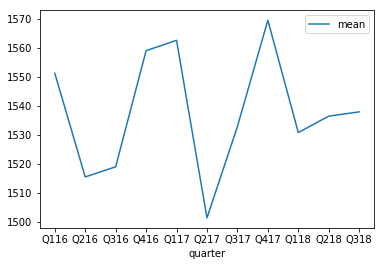

In [83]:
#Route 1 change over travel time 
route1_mean.plot(kind='line', x='quarter', y='mean')
plt.xticks(np.arange(0, 11, 1.0))
plt.xticks(np.arange(11), ('Q116', 'Q216', 'Q316', 'Q416', 'Q117', 'Q217', 'Q317', 'Q417', 'Q118', 'Q218', 'Q318'))

([<matplotlib.axis.XTick at 0x1a2076e400>,
 <a list of 11 Text xticklabel objects>)

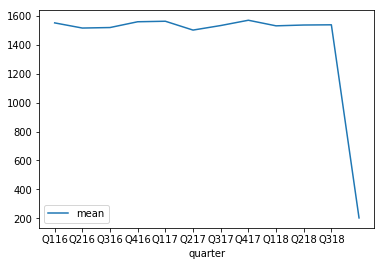

In [82]:
route2_mean.plot(kind='line', x='quarter', y='mean')
plt.xticks(np.arange(0, 11, 1.0))
plt.xticks(np.arange(11), ('Q116', 'Q216', 'Q316', 'Q416', 'Q117', 'Q217', 'Q317', 'Q417', 'Q118', 'Q218', 'Q318'))

([<matplotlib.axis.XTick at 0x1a2069d198>,
 <a list of 11 Text xticklabel objects>)

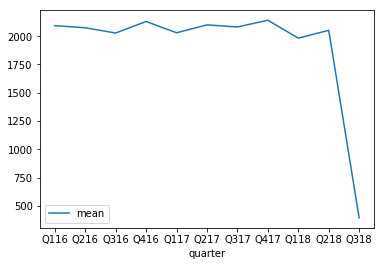

In [81]:
route3_mean.plot(kind='line', x='quarter', y='mean')
plt.xticks(np.arange(0, 11, 1.0))
plt.xticks(np.arange(11), ('Q116', 'Q216', 'Q316', 'Q416', 'Q117', 'Q217', 'Q317', 'Q417', 'Q118', 'Q218', 'Q318'))

([<matplotlib.axis.XTick at 0x1a2062c898>,
 <a list of 11 Text xticklabel objects>)

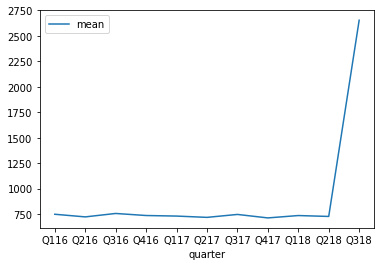

In [80]:
route4_mean.plot(kind='line', x='quarter', y='mean')
plt.xticks(np.arange(0, 11, 1.0))
plt.xticks(np.arange(11), ('Q116', 'Q216', 'Q316', 'Q416', 'Q117', 'Q217', 'Q317', 'Q417', 'Q118', 'Q218', 'Q318'))

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION


# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*